<a href="https://colab.research.google.com/github/hfarruda/deeplearningtutorial/blob/master/deepLearning_RBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Recursive Boltzmann Machine

This example is part of the [*Deep Learning Tutorial*](https://github.com/hfarruda/deeplearningtutorial), authored by Henrique F. de Arruda, Alexandre Benatti, César Comin, and Luciano da Fontoura Costa.

This is the fourth example of deep learning implementation. Here we use a RMB network to provide a recommendation system of musical instru-ments.

First of all, we import the necessary libraries. Here we opt for using Keras (using TensorFlow backend).

In [0]:
import numpy as np
import pandas as pd 
from sklearn.neural_network import BernoulliRBM
import matplotlib.pyplot as plt
import urllib.request
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


The following code downlods a dataset regarding the ratings of musical instruments from the Amazon website ([link](http://snap.stanford.edu/data/amazon/productGraph/)).
These data is divided into four columns, as follows: user id, item id, rating, and timestamp. The latter was removed from our analysis.

In [0]:
main_url = "http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/"
file_name = "ratings_Musical_Instruments.csv"
url = main_url + file_name
col_names = ["user", "item", "rating", "timestamp"]
urllib.request.urlretrieve(url, file_name)
musical_instruments_reviews = pd.read_csv(file_name, names = col_names)

In order to let this tutorial faster, we reduce the data (using only 10%), as follows.

In [0]:
number_of_items = 20

frac = 0.10#fraction of selected items


#getting a sample
musical_instruments_reviews = musical_instruments_reviews.sample(frac = frac)

#Defining dataset variables
rating = musical_instruments_reviews["rating"].get_values()
rating /= np.max(rating)

users = musical_instruments_reviews["user"].get_values()

label_encoder = LabelEncoder()
item = musical_instruments_reviews["item"].get_values()
item = label_encoder.fit_transform(item)

#One hot encoding
item_one_hot_encoding = np_utils.to_categorical(item)

#keeping only the desired number of items
item2count = np.sum(item_one_hot_encoding,axis = 0)
selected_columns = np.argsort(item2count)[::-1]
selected_columns = selected_columns[0:number_of_items]
#Tterminar aqui...


#Weightening the codings
item_weighted = [item_one_hot_encoding[i] * rating[i] 
                 for i in range(len(rating))]

item_weighted = np.array(item_weighted)

user2table_lines = {user: np.argwhere(user == users).T[0]
                    for user in set(users)}

user2purchases = {user:np.max(item_weighted[user2table_lines[user]],axis = 0)
                  for user in set(users)}

In the next step, we eliminate the data from users that bought a single item.

In [0]:
keep_users = [key for key in user2table_lines.keys() 
               if len(user2table_lines[key]) != 1]

user2purchases = {user:user2purchases[user] for user in keep_users}

data = list(user2purchases.values())
data = np.array(data)

The following code is employed to merge the products purchased by each of the purchasers. 

In [0]:
#finding columns only with zeros
keep_positions = np.argwhere(np.sum(data,axis = 0) > 0).T[0]
data = data[:,keep_positions]

The code presented as follows define the neuronal network.

In [0]:
batch_size = 128
learning_rate = 0.001
n_components = number_of_items #Number of binary hidden units.
n_iter = 500
verbose = 1

rbm_model = BernoulliRBM(batch_size = batch_size, learning_rate = learning_rate,
                         n_components = n_components, n_iter = n_iter, 
                         verbose = verbose)

Here, we present the training step.

In [0]:
rbm_model.fit_transform(data)

array([[0.10975768, 0.10930907, 0.10915918, ..., 0.10969742, 0.11036326,
        0.10974015],
       [0.1116634 , 0.11051105, 0.10793873, ..., 0.11058208, 0.10872965,
        0.10900024],
       [0.11241772, 0.11296757, 0.11212062, ..., 0.11192934, 0.11254311,
        0.11190257],
       ...,
       [0.11207127, 0.11131264, 0.11106349, ..., 0.11139181, 0.11053445,
        0.11086935],
       [0.10877728, 0.1117522 , 0.11181915, ..., 0.11038228, 0.11217879,
        0.11155387],
       [0.10966244, 0.1108713 , 0.11112191, ..., 0.10956941, 0.11038618,
        0.11176722]])

Finally, we test the network.

In [0]:
test_set = np.zeros(len(keep_positions))
test_set[100] = 1
a = rbm_model.transform([test_set])

array([[0.11038611, 0.11112356, 0.11126034, ..., 0.11115437, 0.1118898 ,
        0.11029444]])

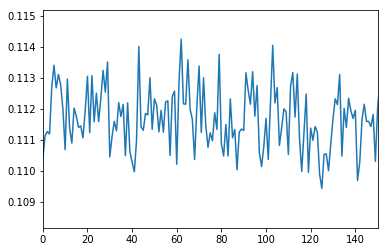

In [0]:
plt.plot(a[0])
plt.xlim(0,150)
a

## License

This Deep Learning Tutorial is licensed under a Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 (CC BY-NC-ND 4.0) International License.